In [1]:
from sys import path
import yaml
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import InMemorySaver

path.append("../src/")

from utils import format_messages
from subagents.research_agent import Research

# compilation config
checkpointer = InMemorySaver()
compile_config = {'checkpointer': checkpointer}

# llm config
llm_config = yaml.safe_load(open("../config/llm.yaml", "rb"))

# app
app = Research(
    llm_config=llm_config.get("research"),
    compile_config=compile_config
)

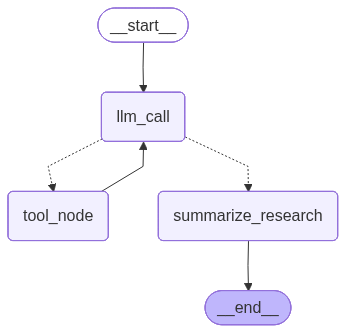

In [2]:
from IPython.display import Image, display

display(Image(app.compiled_graph.get_graph(xray=True).draw_mermaid_png()))

In [3]:
# Run the agent
from utils import format_messages
from langchain_core.messages import HumanMessage

# Example brief
research_brief = """I want to identify and evaluate the coffee shops in San Francisco that are considered the best based specifically  
on coffee quality. My research should focus on analyzing and comparing coffee shops within the San Francisco area, 
using coffee quality as the primary criterion. I am open regarding methods of assessing coffee quality (e.g.,      
expert reviews, customer ratings, specialty coffee certifications), and there are no constraints on ambiance,      
location, wifi, or food options unless they directly impact perceived coffee quality. Please prioritize primary    
sources such as the official websites of coffee shops, reputable third-party coffee review organizations (like     
Coffee Review or Specialty Coffee Association), and prominent review aggregators like Google or Yelp where direct  
customer feedback about coffee quality can be found. The study should result in a well-supported list or ranking of
the top coffee shops in San Francisco, emphasizing their coffee quality according to the latest available data as  
of July 2025."""

config = {"configurable": {"thread_id": "scoping-session-1"}}
result = await app.ainvoke(
    {"messages": [
        HumanMessage(content=f"{research_brief}.")
    ]},
    config=config
)
format_messages(result['messages'])

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ I want to identify and evaluate the coffee shops in San Francisco that are considered the best based            │
│ specifically                                                                                                    │
│ on coffee quality. My research should focus on analyzing and comparing coffee shops within the San Francisco    │
│ area,                                                                                                           │
│ using coffee quality as the primary criterion. I am open regarding methods of assessing coffee quality (e.g.,   │
│ expert reviews, customer ratings, specialty coffee certifications), and there are no constraints on ambiance,   │
│ location, wifi, or food options unless they directly impact perceived coffee quality. Please prioritize primary │
│ sources such as the official websites of coffee shops, reputable third-party coffee review organizations (like  │
│ Coffee Review or Specialty Coffee Association), and prominent review aggregators like Google or Yelp where      │
│ direct                                                                                                          │
│ customer feedback about coffee quality can be found. The study should result in a well-supported list or        │
│ ranking of                                                                                                      │
│ the top coffee shops in San Francisco, emphasizing their coffee quality according to the latest available data  │
│ as                                                                                                              │
│ of July 2025..                                                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: tavily_search                                                                                     │
│    Args: {                                                                                                      │
│   "query": "best coffee shops San Francisco coffee quality reviews 2025"                                        │
│ }                                                                                                               │
│    ID: call_CFxKegB8SRxPEu5qYBJsrk6V                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Search results:                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 1: The Best Coffee Shops in San Francisco in 2025 (Ranking) ---                                      │
│ URL: https://coffeewithdamian.com/blog/best-coffee-shops-in-san-francisco/                                      │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ <summary>                                                                                                       │
│ The article by Damian ranks the best coffee shops in San Francisco for 2025, showcasing a selection curated     │
│ from his global coffee shop reviews. The piece emphasizes the subjective nature of personal taste in coffee     │
│ experiences, inviting readers to enjoy discovering their own favorites. The top-rated coffee shop, Saint Frank  │
│ Coffee, is highlighted for its friendly staff, excellent coffee, and inviting ambiance, receiving an overall    │
│ rank of 8.0 based on various criteria, including pricing and atmosphere. The article invites readers to suggest │
│ shops for review or seek recommendations.                                                                       │
│ </summary>                                                                                                      │
│                                                                                                                 │
│ <key_excerpts>                                                                                                  │
│ Saint Frank Coffee received an overall rank of 8.0 based on friendly service and a great atmosphere. My         │
│ research led me to Saint Frank Coffee; it was the jackpot for amazing coffee, ambiance, and service! Enjoy the  │
│ journey of exploring the world of San Francisco Coffee Shops.                                                   │
│ </key_excerpts>                                                                                                 │
│                                                                                                                 │
│ --------------------------------------------------------------------------------                                │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 2: Best Coffee Cafe in San Francisco 2025 | Top 10 Local Picks ---                                   │
│ URL: https://www.foodaholix.com/blogs/best-coffee-cafe-san-francisco-2025/                                      │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ <summary>                                                                                                       │
│ In 2025, San Francisco's café scene continues to thrive, showcasing some of the best coffee cafes in the city   │
│ according to Foodaholix. The list includes top picks such as Saint Frank Coffee, known for its ethically        │
│ sourced beans and welcoming atmosphere; Pinhole Coffee,

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: think_tool                                                                                        │
│    Args: {                                                                                                      │
│   "reflection": "I found several sources ranking the best coffee shops in San Francisco based on coffee         │
│ quality. The first source highlights Saint Frank Coffee as a top choice, emphasizing its excellent coffee and   │
│ friendly service. The second source also mentions Saint Frank Coffee and includes other notable cafes like      │
│ Pinhole Coffee and Martha & Bros. Coffee Co., focusing on their unique offerings and community engagement. The  │
│ third source from Yelp lists several coffee shops, including Q Specialty Coffee and Sightglass Coffee, which    │
│ are highly rated. \n\nHowever, I need to verify the coffee quality assessments from more primary sources,       │
│ especially expert reviews and customer feedback. I should look for specific ratings or certifications related   │
│ to coffee quality from reputable organizations."                                                                │
│ }                                                                                                               │
│    ID: call_PGvSlyejkGgxzd1lYRfA3pET                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Reflection recorded: I found several sources ranking the best coffee shops in San Francisco based on coffee     │
│ quality. The first source highlights Saint Frank Coffee as a top choice, emphasizing its excellent coffee and   │
│ friendly service. The second source also mentions Saint Frank Coffee and includes other notable cafes like      │
│ Pinhole Coffee and Martha & Bros. Coffee Co., focusing on their unique offerings and community engagement. The  │
│ third source from Yelp lists several coffee shops, including Q Specialty Coffee and Sightglass Coffee, which    │
│ are highly rated.                                                                                               │
│                                                                                                                 │
│ However, I need to verify the coffee quality assessments from more primary sources, especially expert reviews   │
│ and customer feedback. I should look for specific ratings or certifications related to coffee quality from      │
│ reputable organizations.                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: tavily_search                                                                                     │
│    Args: {                                                                                                      │
│   "query": "coffee quality ratings San Francisco coffee shops expert reviews"                                   │
│ }                                                                                                               │
│    ID: call_mw2Z4QVkpO69P5SeRNcOmpmm                                                                            │
│                                                                                                                 │
│ 🔧 Tool Call: tavily_search                                                                                     │
│    Args: {                                                                                                      │
│   "query": "Specialty Coffee Association San Francisco coffee shops 2025"                                       │
│ }                                                                                                               │
│    ID: call_5HpK5LuRdt2h6tdW0kWTG8qM                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Search results:                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 1: Coffee Shop San Francisco, CA - Last Updated November 2025 - Yelp ---                             │
│ URL: https://www.yelp.com/search?find_desc=Coffee+Shop&find_loc=San+Francisco%2C+CA                             │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ 1. Q Specialty Coffee. 4.6 (45 reviews). 2.0 mi. 3490 California St, Ste A San Francisco, CA 94118 · 2.         │
│ Compton's Coffee House. 4.6 (238 reviews). 1.8 mi · 3.                                                          │
│                                                                                                                 │
│ --------------------------------------------------------------------------------                                │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 2: San Francisco Coffee Ratings and Reviews ---                                                      │
│ URL: https://www.coffeereview.com/best-coffee-cities/san-francisco/                                             │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ <summary>                                                                                                       │
│ The webpage from Coffee Review provides a comprehensive overview of coffee ratings and reviews specifically for │
│ San Francisco, featuring a total of 263 reviews of coffees and espressos roasted in the area. The reviews are   │
│ organized in reverse chronological order and highlight various coffees with their respective prices and tasting │
│ notes. Notable high-rated coffees include 'Ethiopia Sidama Natural Dur Feres' and 'Roaster’s Reserve Guatemala  │
│ Ayarza', praised for their rich flavors and distinct profiles. The reviews also showcase products from          │
│ well-known roasters such as Equator Coffees and Souvenir Coffee, with detailed sensory descriptions to guide    │
│ coffee enthusiasts. The site emphasizes that older reviews may not reflect current offerings. Additionally, the │
│ webpage features links to various sections for advanced coffee searches, equipment reviews, and educational     │
│ resources.                                                                                                      │
│ </summary>                                                                                                      │
│                                                                                                                 │
│ <key_excerpts>                                                                                                  │
│ Richly sweet, deeply fruity. Aromas and flavors of raspberry, cocoa nib, honey, lilac and Meyer lemon zest. -   │
│ ‘Ethiopia Sidama Natural Dur Feres’ review. Deep-toned, oaky, original. Blood orange, oak barrel, fresh         │
│ leather, lavender, caramel in aroma and cup. - ‘Mocha J

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Search results:                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 1: DAY 1 — SF Coffee Festival 2025 ☕️   San Francisco ... - Instagram ---                            │
│ URL: https://www.instagram.com/reel/DQ0ey-EjCxp/                                                                │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ Immerse yourself in the world of specialty coffee at the SF Coffee Festival 2025. Our team is excited to share  │
│ our passion for quality and                                                                                     │
│                                                                                                                 │
│ --------------------------------------------------------------------------------                                │
│                                                                                                                 │
│                                                                                                                 │
│ --- SOURCE 2: San Francisco Coffee Festival ---                                                                 │
│ URL: https://www.sfcoffeefestival.com/                                                                          │
│                                                                                                                 │
│ SUMMARY:                                                                                                        │
│ <summary>                                                                                                       │
│ The San Francisco Coffee Festival is scheduled for November 8 and 9, 2025, at the Fort Mason Center for Arts &  │
│ Culture. This immersive event will showcase specialty coffee roasters, unique coffee beans, delicious snacks,   │
│ and live entertainment, aimed at providing a comprehensive coffee culture experience. Tickets are available for │
│ purchase on the festival's website, and attendees are encouraged to follow the festival's Instagram for         │
│ updates.                                                                                                        │
│ </summary>                                                                                                      │
│                                                                                                                 │
│ <key_excerpts>                                                                                                  │
│ San Francisco Coffee Festival provides an immersive coffee experience, featuring the best specialty roasters    │
│ and delicious snacks. Tickets are available online, and attendees can follow @SFCOFFEEFESTIVAL on Instagram for │
│ more updates. The festival promises to be a notable celebration of coffee culture.                              │
│ </key_excerpts>                                                                                                 │
│                                                                                                                 │
│ --------------------------------------------------------------------------------                                │
│                                                        

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: think_tool                                                                                        │
│    Args: {                                                                                                      │
│   "reflection": "I found additional sources that provide insights into coffee quality in San Francisco. The     │
│ Coffee Review site offers a detailed overview of coffee ratings and reviews, highlighting specific coffees and  │
│ their tasting notes, which can help assess the quality of coffee served at various shops. Notable coffees       │
│ mentioned include 'Ethiopia Sidama Natural Dur Feres' and 'Roaster\u2019s Reserve Guatemala Ayarza', which are  │
│ praised for their rich flavors. \n\nYelp continues to list top-rated coffee shops, including Q Specialty Coffee │
│ and The Coffee Movement, which have high customer ratings. The Per Diem app also reviews popular coffee shops,  │
│ emphasizing their ambiance and customer ratings, with The Coffee Movement receiving a high score of 4.8/5.      │
│ \n\nThe San Francisco Coffee Festival is another relevant event that showcases specialty coffee roasters, which │
│ could provide insights into the best coffee shops in the area. However, I still need to compile a list of       │
│ specific coffee shops and their ratings based on the gathered data. I should now focus on synthesizing this     │
│ information into a coherent ranking or list."                                                                   │
│ }                                                                                                               │
│    ID: call_7U8y2OrPrbd33YzfxRYqPSAa                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Reflection recorded: I found additional sources that provide insights into coffee quality in San Francisco. The │
│ Coffee Review site offers a detailed overview of coffee ratings and reviews, highlighting specific coffees and  │
│ their tasting notes, which can help assess the quality of coffee served at various shops. Notable coffees       │
│ mentioned include 'Ethiopia Sidama Natural Dur Feres' and 'Roaster’s Reserve Guatemala Ayarza', which are       │
│ praised for their rich flavors.                                                                                 │
│                                                                                                                 │
│ Yelp continues to list top-rated coffee shops, including Q Specialty Coffee and The Coffee Movement, which have │
│ high customer ratings. The Per Diem app also reviews popular coffee shops, emphasizing their ambiance and       │
│ customer ratings, with The Coffee Movement receiving a high score of 4.8/5.                                     │
│                                                                                                                 │
│ The San Francisco Coffee Festival is another relevant event that showcases specialty coffee roasters, which     │
│ could provide insights into the best coffee shops in the area. However, I still need to compile a list of       │
│ specific coffee shops and their ratings based on the gathered data. I should now focus on synthesizing this     │
│ information into a coherent ranking or list.                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ Based on the research conducted, here is a list of some of the best coffee shops in San Francisco, evaluated    │
│ primarily on coffee quality. The information is derived from expert reviews, customer ratings, and notable      │
│ coffee quality assessments.                                                                                     │
│                                                                                                                 │
│ ### Top Coffee Shops in San Francisco (2025)                                                                    │
│                                                                                                                 │
│ 1. **Saint Frank Coffee**                                                                                       │
│    - **Rating**: 8.0/10 (Damian's Blog)                                                                         │
│    - **Highlights**: Known for its friendly staff and excellent coffee. It emphasizes ethically sourced beans   │
│ and has a welcoming atmosphere.                                                                                 │
│                                                                                                                 │
│ 2. **Pinhole Coffee**                                                                                           │
│    - **Rating**: Not specified, but highly recommended (Foodaholix)                                             │
│    - **Highlights**: Features an artsy vibe and focuses on community engagement. Known for its unique coffee    │
│ offerings.                                                                                                      │
│                                                                                                                 │
│ 3. **The Coffee Movement**                                                                                      │
│    - **Rating**: 4.8/5 (Per Diem app)                                                                           │
│    - **Highlights**: Praised for its cozy environment and outstanding coffee quality. It has a vibrant          │
│ atmosphere that attracts coffee enthusiasts.                                                                    │
│                                                                                                                 │
│ 4. **Q Specialty Coffee**                                                                                       │
│    - **Rating**: 4.6/5 (Yelp)                                                                                   │
│    - **Highlights**: Recognized for its high-quality coffee and customer service. It is a popular choice among  │
│ locals.                                                                                                         │
│                                                                                                                 │
│ 5. **Sightglass Coffee**                                                                                        │
│    - **Rating**: Not specified, but highly rated (Yelp)                                                         │
│    - **Highlights**: Known for its specialty coffee and unique brewing methods. It has a strong reputation in   │
│ the coffee community.                                                                                           │
│                                                                                                                 │
│ 6. **Martha & Bros. Coffee Co.**                                                                                │
│    - **Rating**: Not specified, but noted for quality (Foodaholix)                                              │
│    - **Highlights**: Celebrated for its fresh pastries 